Saving Bahrfeldt-19-a.zip to Bahrfeldt-19-a (5).zip


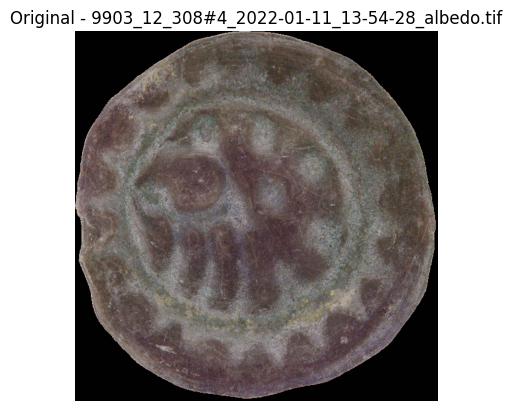

1/1 [==============================] - 1s 794ms/step
Feature Mean:  [[[0.         0.         0.         ... 0.         0.18380015 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.49455363 0.        ]]]
Feature Standard Deviation:  [[[0.        0.        0.        ... 0.        0.4502166 0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  ...
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        0.        0.       ]
  [0.        0.        0.        ... 0.        1.0688901 0.       ]]]


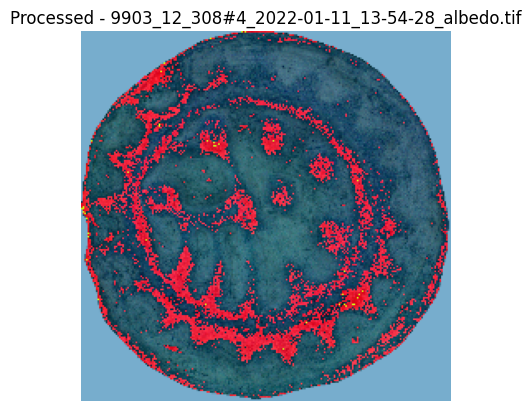

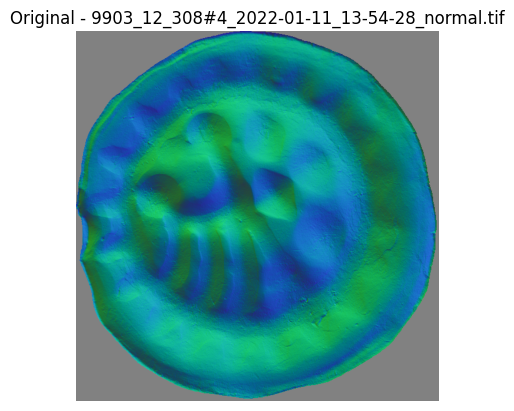

1/1 [==============================] - 1s 921ms/step
Feature Mean:  [[[0.         0.         0.         ... 0.         0.16278812 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.491498   0.        ]]]
Feature Standard Deviation:  [[[0.         0.         0.         ... 0.         0.39874783 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         1.0692058  0.        ]]]

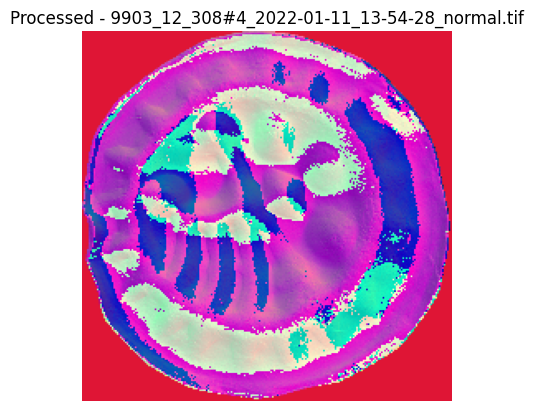

In [7]:
import cv2
import numpy as np
import zipfile
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from google.colab import files
import matplotlib.pyplot as plt

# Upload the zip file to Colab
uploaded = files.upload()
for zip_file in uploaded.keys():
    # Unzip the file
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('images')

# Initialize the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

def process_image(image_path):
    """Read and preprocess the image"""
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        print(f"Image at path {image_path} could not be loaded.")
        return None

    # Normalize the image to the range [0, 1]
    min_value = np.min(image)
    max_value = np.max(image)
    image_normalized = (image - min_value) / (max_value - min_value)

    # Resize the image
    image_resized = cv2.resize(image_normalized, (224, 224))

    # Preprocess the image for VGG16
    image_preprocessed = preprocess_input(image_resized)
    return image_preprocessed

def explore_features(features):
    """Explore and analyze the features"""
    mean_features = np.mean(features, axis=1)
    std_features = np.std(features, axis=1)
    print("Feature Mean: ", mean_features)
    print("Feature Standard Deviation: ", std_features)

def visualize_image(image, title):
    """Visualize the image ensuring pixel values are in the correct range"""
    norm_image = (image * 255).astype(np.uint8)

    plt.imshow(norm_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Traverse the 'images' folder and process each image
image_paths = [os.path.join('images', file_name) for file_name in os.listdir('images')]
for img_path in image_paths:
    # Load the original image
    original_image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    if original_image is None:
        continue

    # Visualize the original image
    visualize_image(original_image, f"Original - {os.path.basename(img_path)}")

    # Process the image
    processed_img = process_image(img_path)
    if processed_img is not None:
        # Extract features using the model
        features = model.predict(np.expand_dims(processed_img, axis=0))
        # Explore the features
        explore_features(features)

        # Visualize the processed image
        visualize_image(processed_img, f"Processed - {os.path.basename(img_path)}")
